## **Libraries Needed**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [34]:
data=pd.read_csv("/kc_house_data.csv")

In [35]:
data.dtypes


id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## **Data Cleaning**

In [36]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## dropping unneccessary columns

In [8]:

list=["waterfront","view","condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated"]
for i in list :
  count = (data[i] == 0).sum()
  print(f"{i} has {count} zero values.")






waterfront has 21450 zero values.
view has 19489 zero values.
condition has 0 zero values.
grade has 0 zero values.
sqft_above has 0 zero values.
sqft_basement has 13126 zero values.
yr_built has 0 zero values.
yr_renovated has 20699 zero values.


In [38]:
data.drop(columns=["id"],inplace=True)

In [39]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [12]:
data["floors"].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


<Axes: xlabel='waterfront', ylabel='price'>

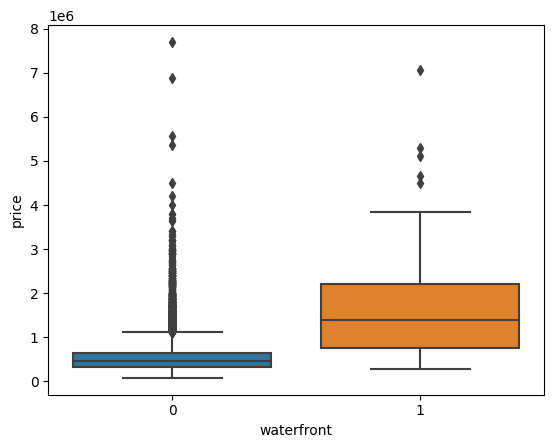

In [40]:
sns.boxplot(x="waterfront",y="price",data=data)

#Using  the function <code>regplot</code>  in the seaborn library  to  determine if the feature <code>sqft_above</code> is negatively or positively correlated with price.


<Axes: xlabel='sqft_above', ylabel='price'>

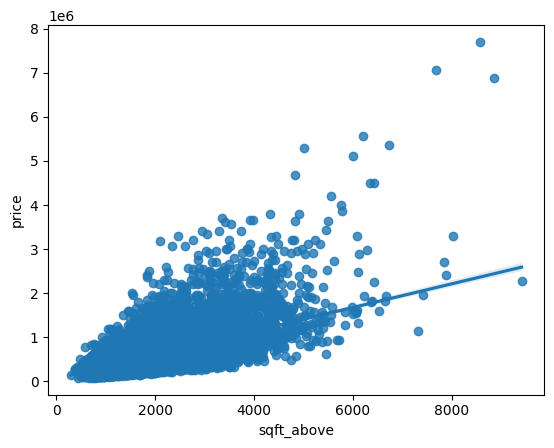

In [13]:
sns.regplot(x="sqft_above",y="price",data=data)

We can use the Pandas method <code>corr()</code>  to find the feature other than price that is most correlated with price.

In [14]:
data.corr()['price'].sort_values()

<ipython-input-14-ecb20c7671d1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['price'].sort_values()


zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
floors           0.256794
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

## **Model Development**

We can Fit a linear regression model using the  longitude feature <code>'long'</code> and  caculate the R^2.

In [41]:
lm=LinearRegression()
x=data[["sqft_living"]]
y=data[["price"]]
lm.fit(x,y)
lm.score(x,y)

0.4928532179037931

Fit a linear regression model to predict the 'price' using the list of features

In [16]:
x1=data[["floors","lat" ,"bedrooms" ,"sqft_basement" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
y1=data["price"]
lm.fit(x1,y1)
lm.score(x1,y1)

0.6072857423300404

##Creating a Pipeline

In [17]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe=Pipeline(Input)

In [18]:
pipe.fit(x1,y1)
pipe.score(x1,y1)


0.7000717817447811

## Model Evaluation and Refinement

Import the necessary modules:

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [20]:
features =["floors","lat" ,"bedrooms" ,"sqft_basement" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
X = data[features]
Y = data['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

In [21]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# Assuming you have your training and test data as X_train, y_train, X_test, and y_test

# Create a Ridge regression object with a regularization parameter (alpha) set to 0.1
ridge_model = Ridge(alpha=0.1)

# Fit the Ridge regression model to the training data
ridge_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = ridge_model.predict(x_test)

# Calculate the R^2 score to evaluate the model's performance on the test data
r2 = r2_score(y_test, y_pred)

print(f"R^2 score on the test data: {r2:.4f}")

R^2 score on the test data: 0.6016


In [22]:
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
r2 = r2_score(y_test, y_pred)

print(f"R^2 score on the test data: {r2:.4f}")

R^2 score on the test data: 0.6534


# Making a ridge model , with polynomial degree 2

In [42]:
#Using a pipeline

input=[('scale',StandardScaler()),('polynomial',PolynomialFeatures(degree=2,include_bias=False)),('model',Ridge(alpha=0.1))]

In [43]:
pipe1=Pipeline(input)

In [44]:
pipe1.fit(x_train,y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', Ridge(alpha=0.1))])

In [45]:
y_pred=pipe1.predict(x_test)
r2 = r2_score(y_test, y_pred)

print(f"R^2 score on the test data: {r2:.4f}")

R^2 score on the test data: 0.6533
